In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns
import src.bayesian_stats as bst

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v4.2.2


In [2]:
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
az.rcParams["stats.hdi_prob"] = 0.95
rng = np.random.default_rng(seed=42)


In [3]:
df = pd.read_csv('../kruschke_data/Guber1999data.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      50 non-null     object 
 1   Spend      50 non-null     float64
 2   StuTeaRat  50 non-null     float64
 3   Salary     50 non-null     float64
 4   PrcntTake  50 non-null     int64  
 5   SATV       50 non-null     int64  
 6   SATM       50 non-null     int64  
 7   SATT       50 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 3.2+ KB


In [4]:
df.head()

,State,Spend,StuTeaRat,Salary,PrcntTake,SATV,SATM,SATT
0,Alabama,4.405,17.2,31.144,8,491,538,1029
1,Alaska,8.963,17.6,47.951,47,445,489,934
2,Arizona,4.778,19.3,32.175,27,448,496,944
3,Arkansas,4.459,17.1,28.934,6,482,523,1005
4,California,4.992,24.0,41.078,45,417,485,902


In [5]:
X = df[["Spend", "PrcntTake"]]
y = df["SATT"]

_, mu_X, sigma_X = bst.standardize(X)
_, mu_y, sigma_y = bst.standardize(y)

In [6]:
model, idata = bst.multiple_linear_regression(X, y, 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta0, beta, nu_minus_one, nu, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.


In [7]:
idata

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

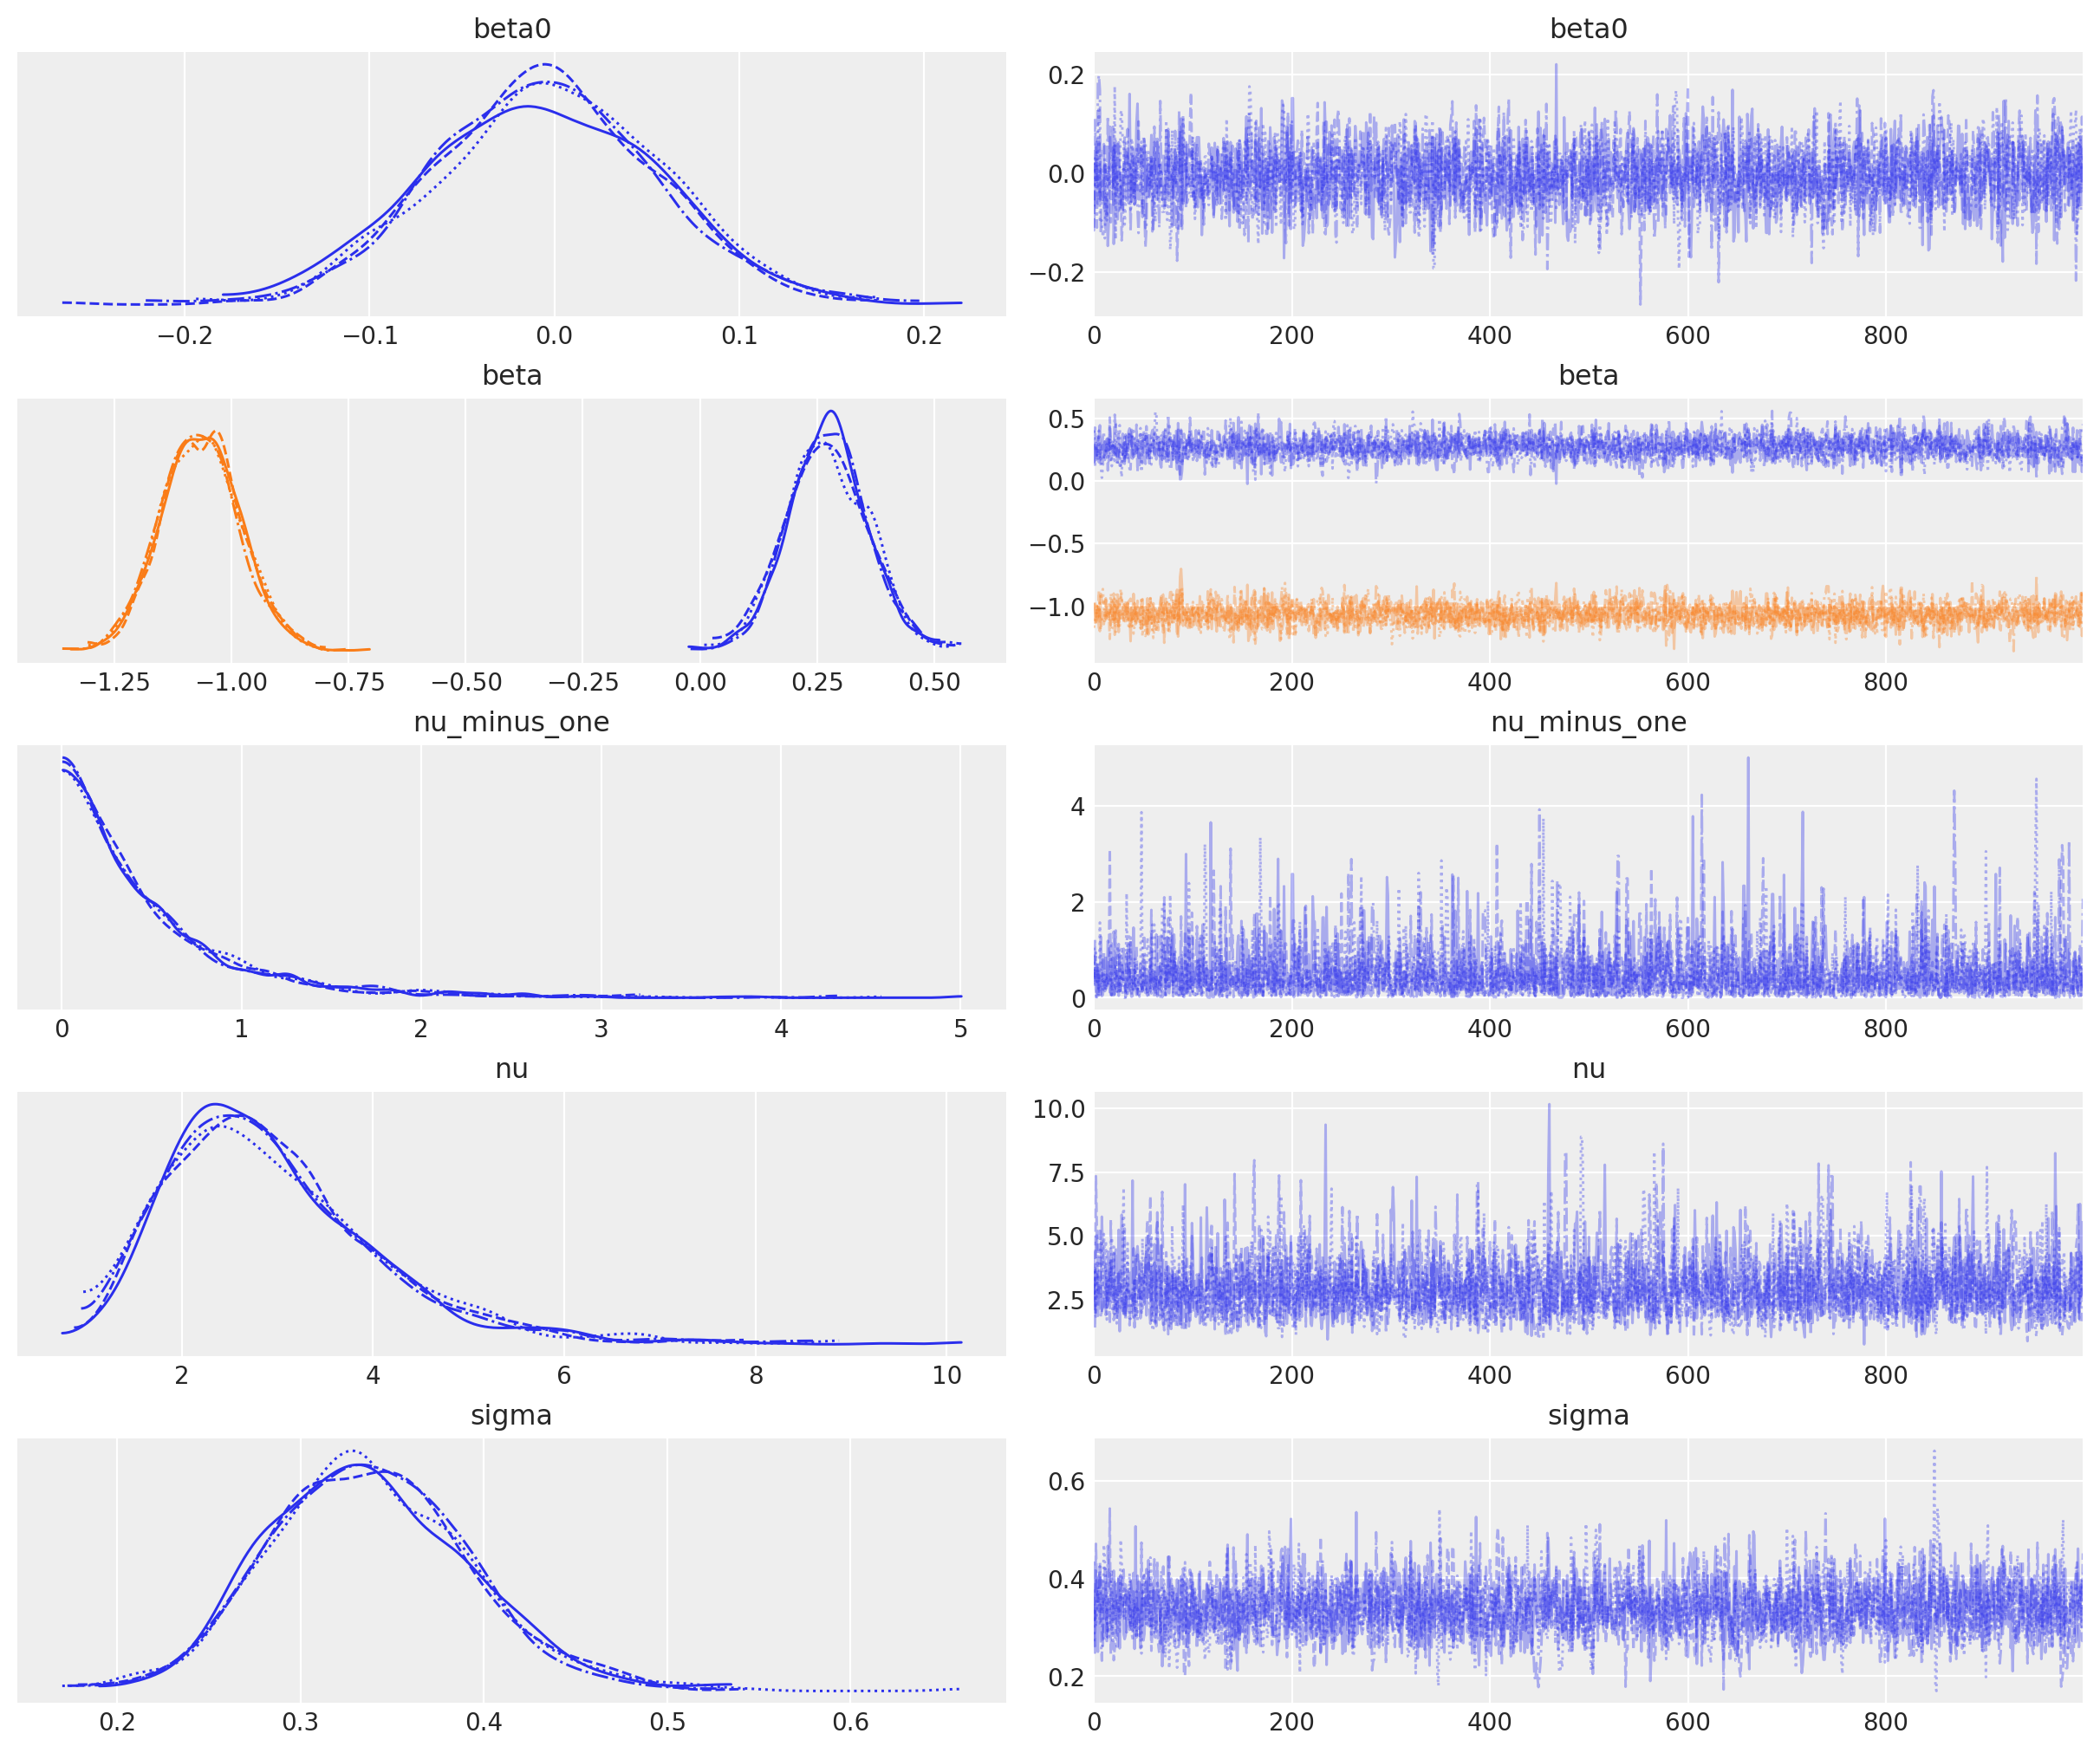

In [8]:
pm.plot_trace(idata);

In [9]:
idata.posterior["beta"].shape

(4, 1000, 2)

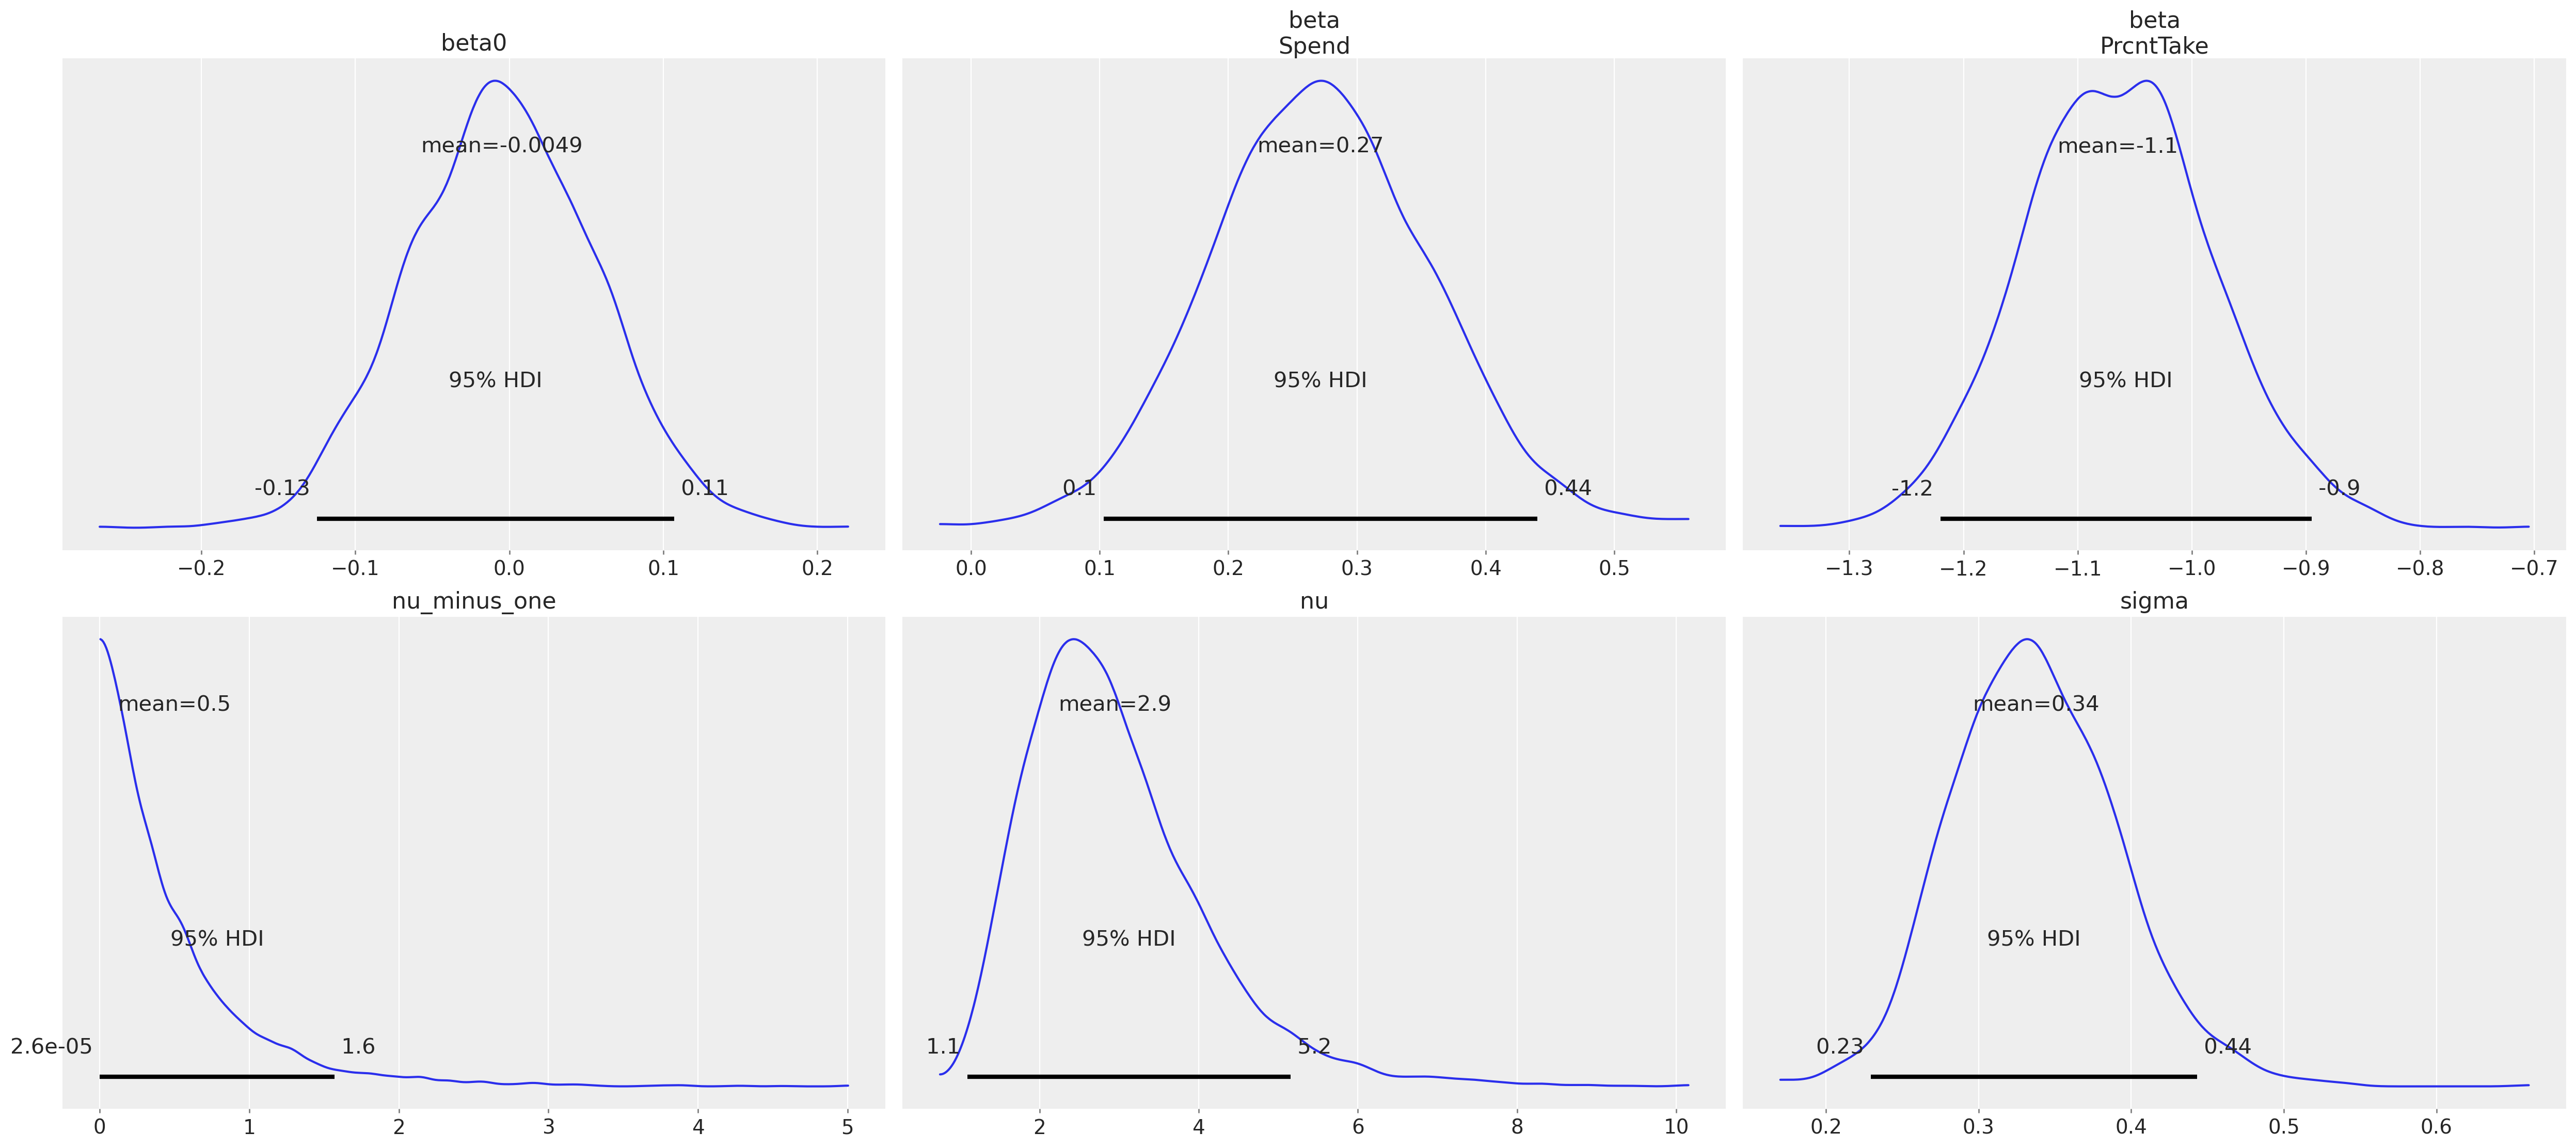

In [14]:
az.plot_posterior(idata);

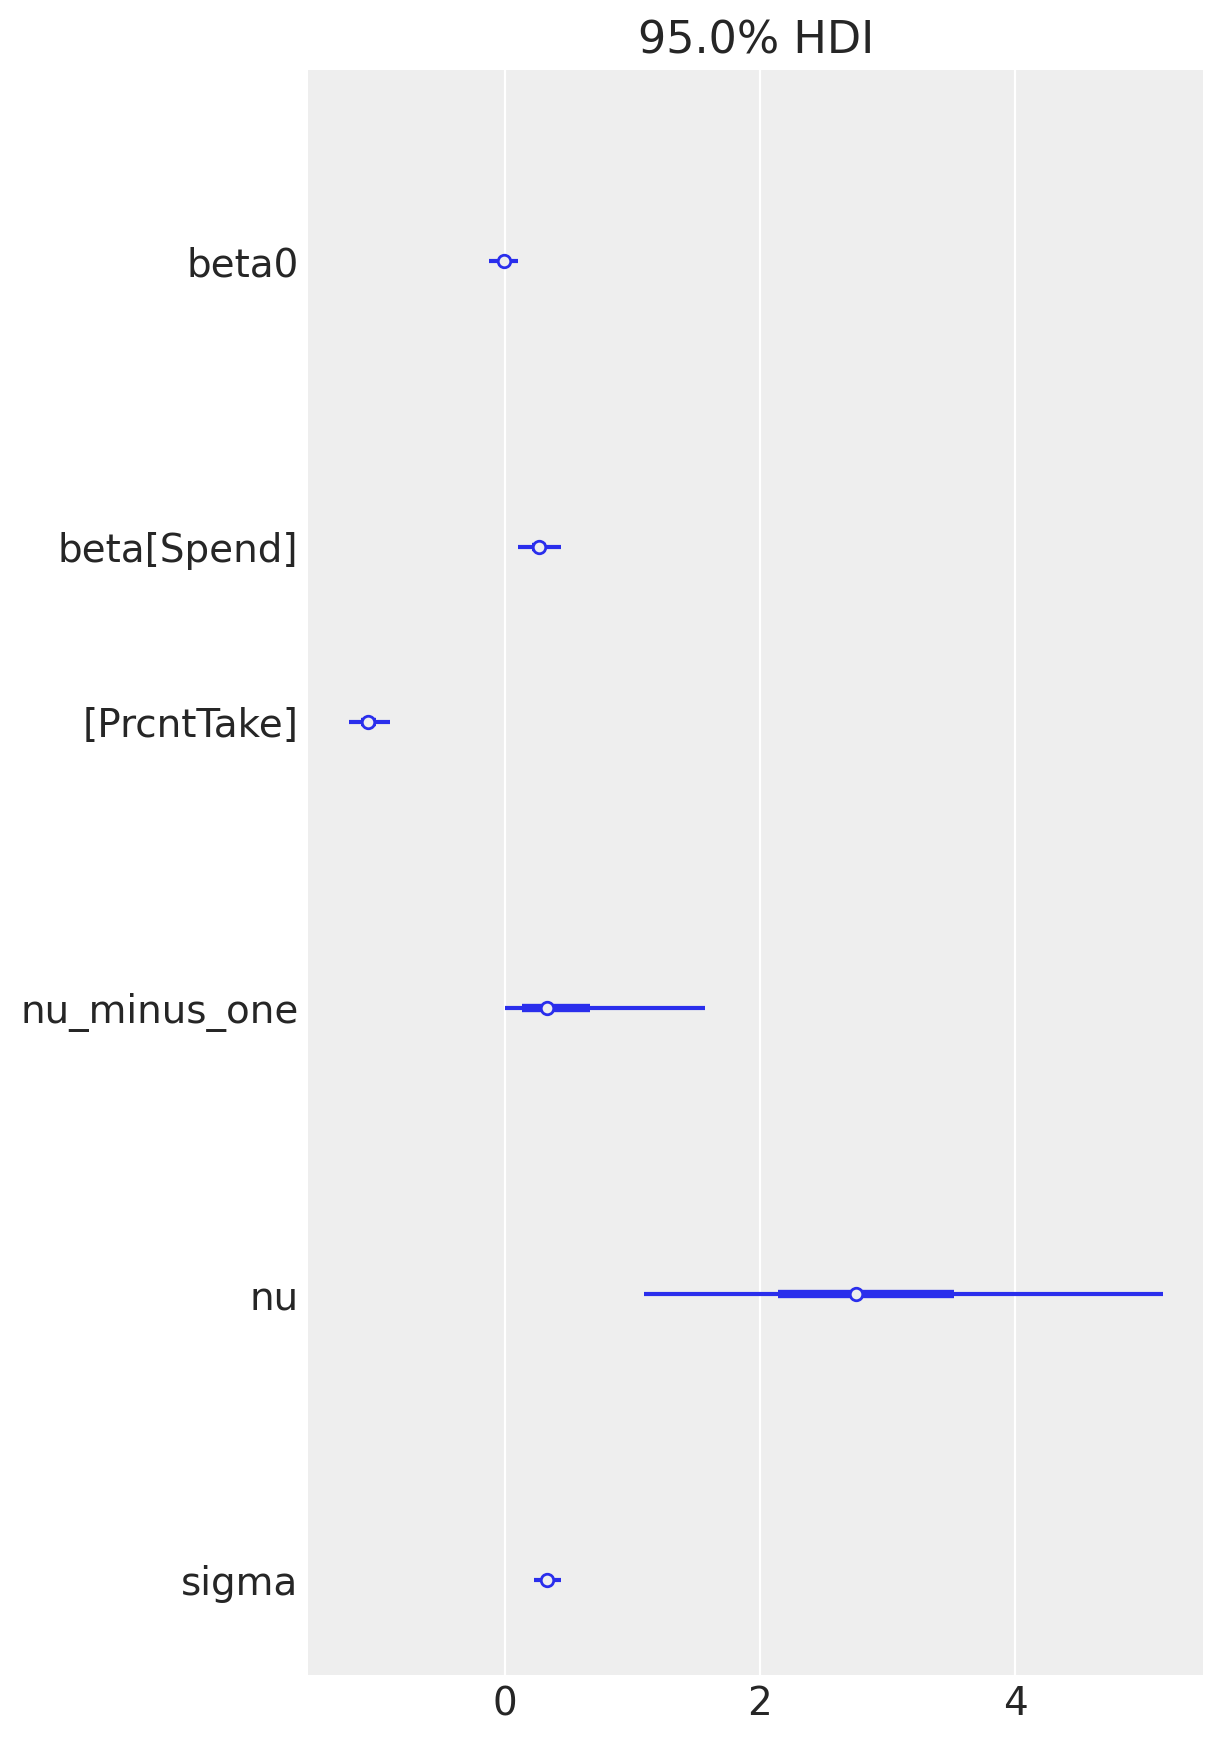

In [15]:
az.plot_forest(idata, combined=True);

In [16]:
idata.posterior["beta"][:, :, 0].shape

(4, 1000)

In [17]:
# Get the dataset corresponding to a single "group" (see: https://arviz-devs.github.io/arviz/getting_started/WorkingWithInferenceData.html#add-a-new-variable)
post = idata.posterior

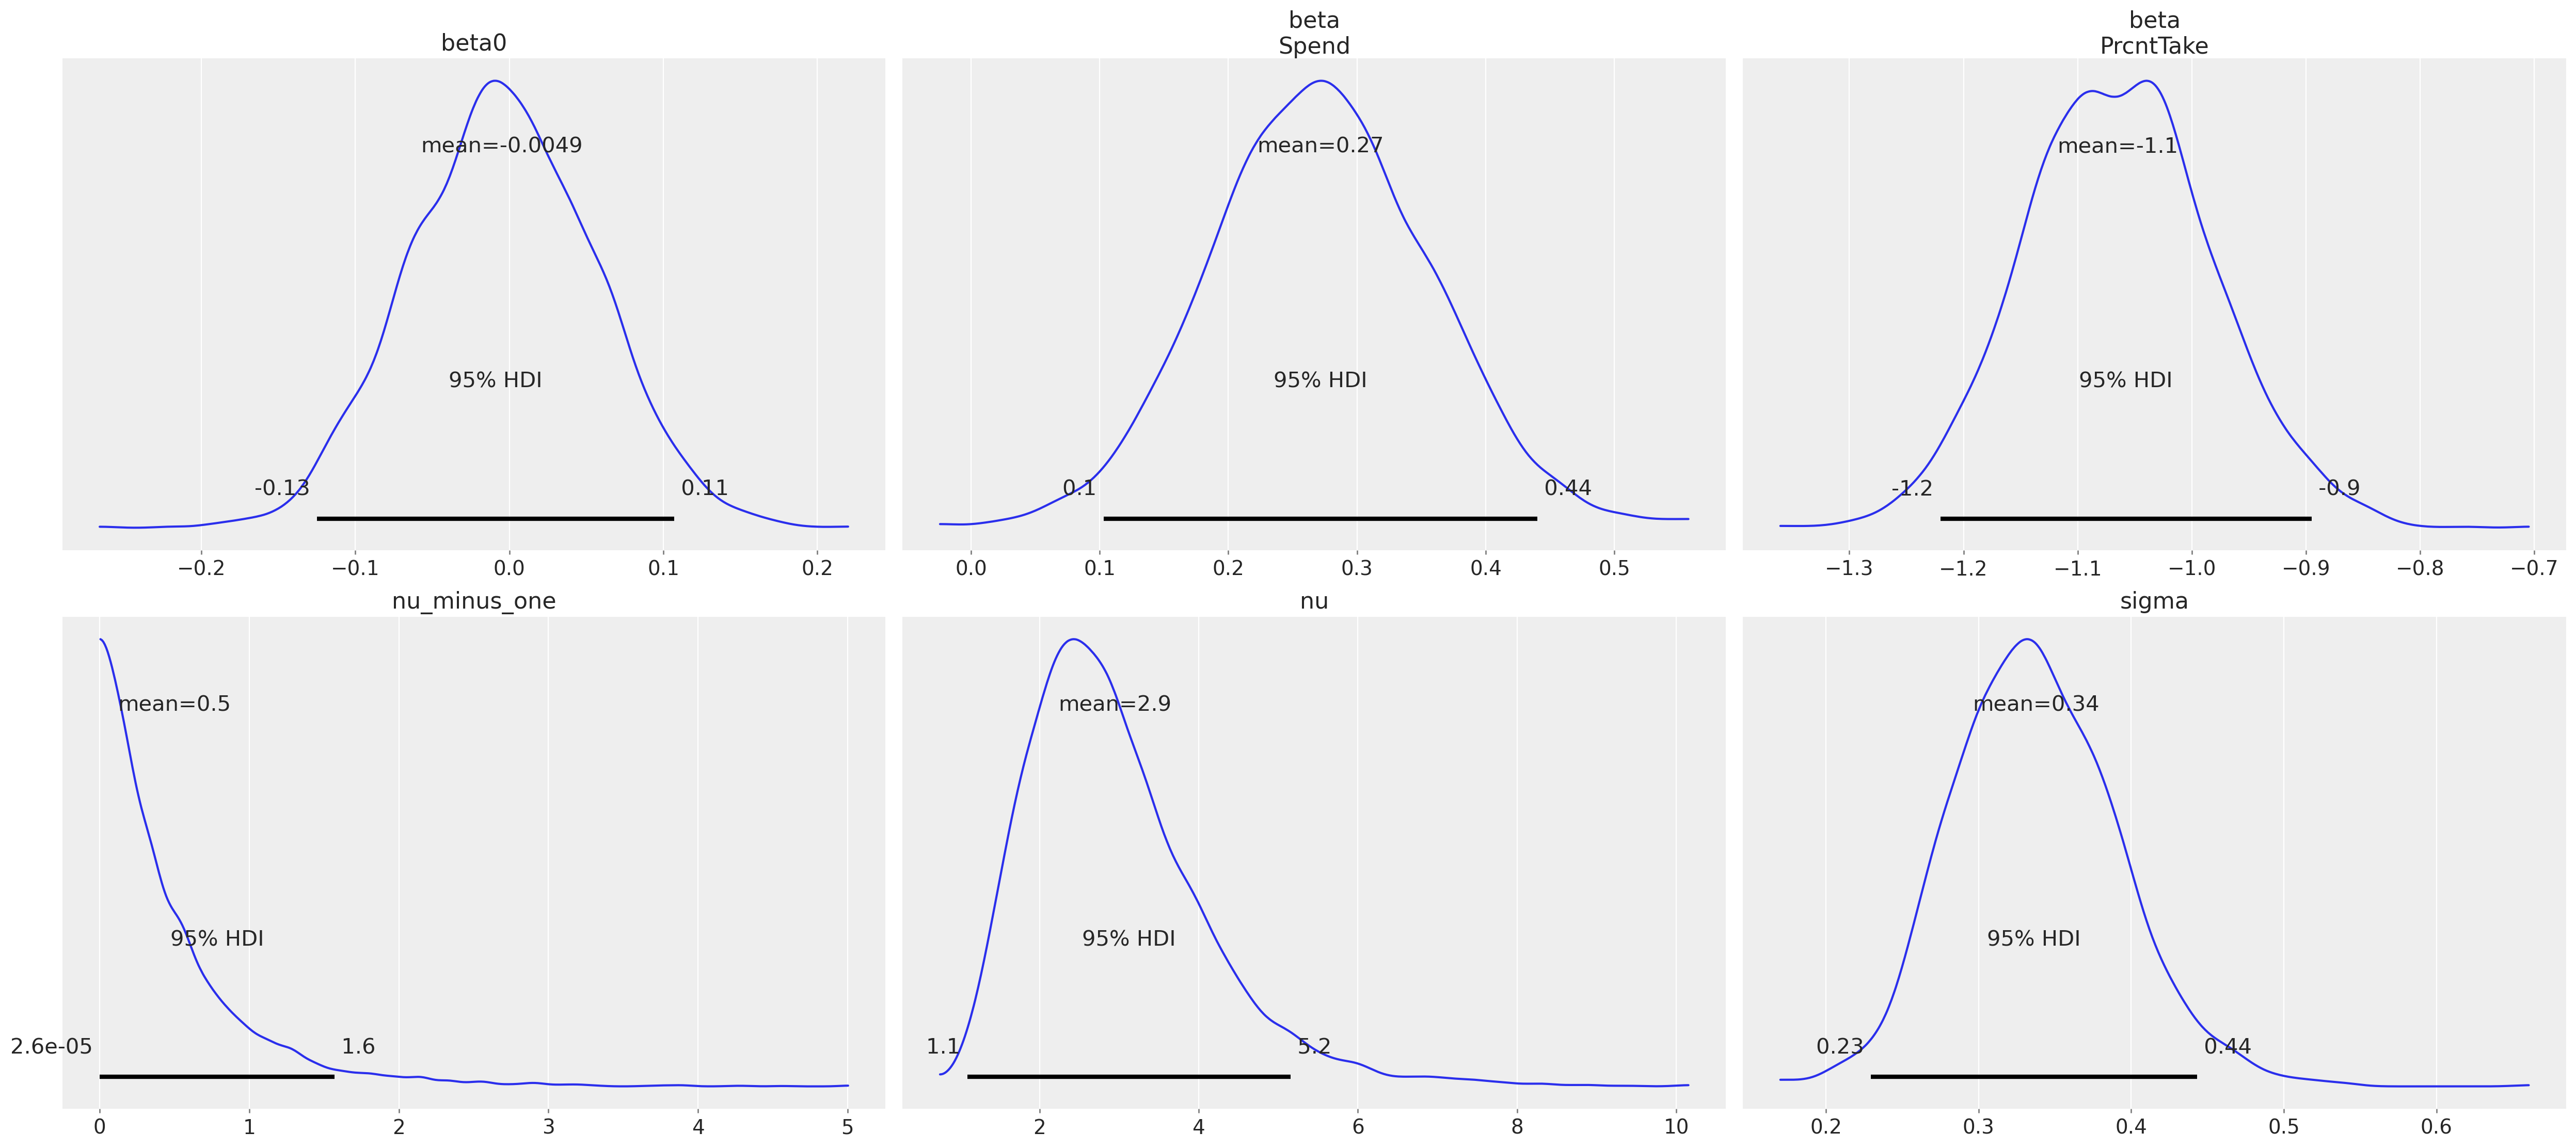

In [18]:
az.plot_posterior(post);

In [25]:
post["beta0_r"] = post["beta0"].values
post

MissingDimensionsError: cannot set variable 'beta0_r' with 2-dimensional data without explicit dimension names. Pass a tuple of (dims, data) instead.

In [ ]:
type(post)

In [ ]:
post["beta0_raw"], post["beta1_raw"], post["sigma_raw"] = bst.revert_multiple_linreg_parameters_raw_scale(post["beta0"], post["beta"], mu_X, mu_y, post["sigma"], sigma_X, sigma_y)

In [ ]:
post["beta0"].values.reshape(4000, -1).shape

In [ ]:
stacked = az.extract(idata)
stacked

In [ ]:
idata